In [1]:
import sys

sys.path.append('/home/alta/Conversational/OET/al826/2022/seq_cls')

In [2]:
from types import SimpleNamespace

from src.eval_handler import EvalHandler
from src.config import config


In [11]:
eval_path = f"{config.base_dir}/data/swda/standard/test.json"
label_path = f"{config.base_dir}/data/swda/standard/labels.json"

test_args = {'test_path':eval_path,
             'label_path':label_path, 
             'bsz':2}

test_args = SimpleNamespace(**test_args)

Es = EvalHandler('arch/led_full', hpc=True)
Ec = EvalHandler('context/bsz4_l1e5', hpc=False)

s_hits, s_counts = Es.position_accuracy(test_args)
c_hits, c_counts = Ec.position_accuracy(test_args)

using the following transformer mode: led
using baseline seq2seq set up
torch.Size([129])
torch.Size([240])
torch.Size([313])
torch.Size([285])
torch.Size([178])
torch.Size([215])
torch.Size([180])
torch.Size([216])
torch.Size([200])
torch.Size([103])
torch.Size([257])
torch.Size([280])
torch.Size([283])
torch.Size([336])
torch.Size([389])
torch.Size([256])
torch.Size([250])
torch.Size([247])
torch.Size([176])
using the following transformer mode: bert
using context set up
torch.Size([128])
torch.Size([239])
torch.Size([312])
torch.Size([284])
torch.Size([177])
torch.Size([214])
torch.Size([179])
torch.Size([215])
torch.Size([199])
torch.Size([102])
torch.Size([256])
torch.Size([279])
torch.Size([282])
torch.Size([335])
torch.Size([388])
torch.Size([255])
torch.Size([249])
torch.Size([246])
torch.Size([175])


<ipython-input-28-d2b92373b4ea>:13: RuntimeWarning: invalid value encountered in true_divide
  bar_plot = np.array(grp_hits)/np.array(grp_counts)
<ipython-input-28-d2b92373b4ea>:13: RuntimeWarning: invalid value encountered in true_divide
  bar_plot = np.array(grp_hits)/np.array(grp_counts)


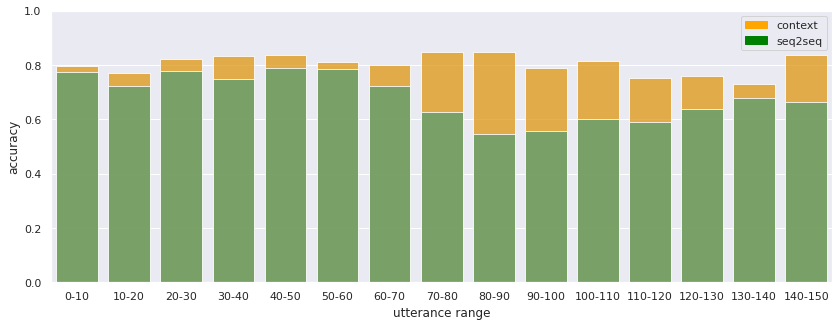

In [28]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.patches as mpatches

def plot_pos_accs(hits, counts, color='r'):
    plt.rcParams["figure.figsize"] = 14, 5
    sns.set_theme()
    
    grp_hits = [np.mean(hits[i:i+10]) for i in range(0,len(hits),10)]
    grp_counts = [np.mean(counts[i:i+10]) for i in range(0,len(counts),10)]

    bar_plot = np.array(grp_hits)/np.array(grp_counts)
    x_axis = [f"{10*i}-{10*(i+1)}" for i in range(len(bar_plot))]

    sns.barplot(x=x_axis[:15], y=bar_plot[:15], alpha=0.8, color=color)
    plt.xlabel('utterance range')
    plt.ylabel('accuracy')
    plt.ylim([0,1])
    

# Creating plot
plot_pos_accs(c_hits, c_counts, color='orange')
plot_pos_accs(s_hits, s_counts, color='g')
  
# Creating legend with color box
orange_patch = mpatches.Patch(color='orange', label='context')
green_patch = mpatches.Patch(color='green', label='seq2seq')
plt.legend(handles=[orange_patch, green_patch])
  
# Show plot
plt.show()